In [1]:
import numpy as np
A = np.array([[1,3,4], [2,3,5],[1,2,3],[5,4,6]])
print(A)

[[1 3 4]
 [2 3 5]
 [1 2 3]
 [5 4 6]]


In [2]:
U, s, Vh = np.linalg.svd(A, full_matrices=False)
print(np.shape(U), np.shape(s), np.shape(Vh))
print(s)

(4, 3) (3,) (3, 3)
[12.26362747  2.11085464  0.38436189]


## Aplicando a validação do SVD em um conjunto de dados, SVD é um conceito de algebra linear chamada de Decomposição de Valores Singulares

## Quando trabalhamos com SVD, de modo geral nos preocupamos com a matriz U resultante, a matriz que representa as linhas, pois é uma substituição do conjunto de dados inicial

In [9]:
validando = s[0] / 14.758844
print(validando)

0.8309341481020968


In [10]:
## Reconstruindo a matriz completamente:
print(np.dot(np.dot(U, np.diag(s)), Vh))

[[1. 3. 4.]
 [2. 3. 5.]
 [1. 2. 3.]
 [5. 4. 6.]]


In [13]:
# Reduzindo a ultima coluna para descobrir o que acontece com a matriz

print( np.round(np.dot(np.dot(U[:,:2], np.diag(s[:2])),
                      Vh[:2,:]),1)) # k=2 reconstruction

[[1.  2.8 4.1]
 [2.  3.2 4.8]
 [1.  2.  3. ]
 [5.  3.9 6. ]]


In [14]:
print(np.round(np.dot(np.dot(U[:,:1], np.diag(s[:1])), Vh[:1,:]),1)) #k=1 reconmstruction

[[2.1 2.5 3.7]
 [2.6 3.1 4.6]
 [1.6 1.8 2.8]
 [3.7 4.3 6.5]]


In [16]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

iris = load_iris()

X = iris.data
Y = iris.target
cols = [s[:12].strip() for s in iris.feature_names]
factor = FactorAnalysis(n_components=4).fit(X)

In [19]:
import pandas as pd
print(pd.DataFrame(factor.components_, columns=cols))

   sepal length  sepal width  petal length  petal width
0      0.706989    -0.158005      1.654236      0.70085
1      0.115161     0.159635     -0.044321     -0.01403
2     -0.000000     0.000000      0.000000      0.00000
3     -0.000000     0.000000      0.000000     -0.00000


In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
ground_rush = digits.target

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,
            init='pca',
            random_state=0,
            perplexity=50,
            early_exaggeration=25,
            n_iter=300)

Tx = tsne.fit_transform(X)

NameError: name 'ground_truth' is not defined

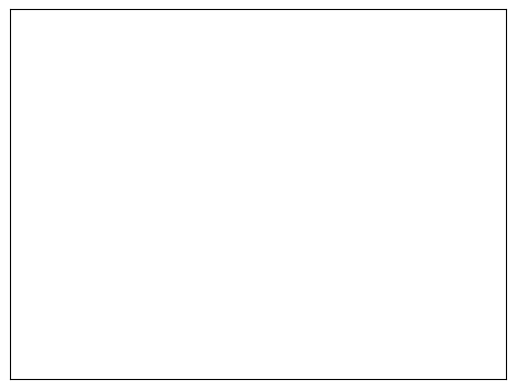

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.xticks([], [])
plt.yticks([], [])
for target in np.unique(ground_truth):
    selection = ground_truth==target
    X1, X2 = Tx[selection, 0], Tx[selection, 1]
    c1, c2 = np.median(X1), np.median(X2)
    plt.plot(X1, X2, 'o', ms=5)
    plt.text(c1, c2, target, fontsize=18)